In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [49]:
file_name_aal = "../../neurolib/data/datasets/aal/atlas/AAL2.nii"
img_aal = nib.load(file_name_aal)
data_aal = img_aal.get_fdata()

lower = img_aal.affine @ [0,0,0,1]
print(lower)
upper = img_aal.affine @ np.hstack((90, 108, 90, 1))
print(upper)

[  90. -126.  -72.    1.]
[-90.  90. 108.   1.]


90.0

In [57]:
def plot_into_aal_space(data, view="yz", lower=lower, upper=upper):
    """ data points in MNI mm!
    """

    plt.figure(figsize=(5,5))
    plt.plot(data)

    if view == "xy": # horizontal
        plt.xlim(lower[0], upper[0])
        plt.ylim(lower[1], upper[1])
        plt.xlabel("x MNI [mm]")
        plt.ylabel("y MNI [mm]")
    elif view == "yz":  # saggital
        plt.xlim(lower[1], upper[1])
        plt.ylim(lower[2], upper[2])
        plt.xlabel("y MNI [mm]")
        plt.ylabel("z MNI [mm]")
    elif view =="xz":  # coronar
        plt.xlim(lower[0], upper[0])
        plt.ylim(lower[2], upper[2])
        plt.xlabel("x MNI [mm]")
        plt.ylabel("z MNI [mm]")

def imshow_into_aal_space(data, view="yz", lower=lower, upper=upper):
    """ data points in MNI mm!
    """

    plt.figure(figsize=(5,5))
    plt.imshow(data.T, cmap="gray", origin="lower")

    # (91, 109, 91)
    ticks_upper = (90, 108, 90)

    factor = 10

    if view == "xy": # horizontal
        plt.xticks(np.arange(0, ticks_upper[0], 1*factor),
                   np.arange(lower[0], upper[0], -2*factor))

        plt.yticks(np.arange(0, ticks_upper[1], 1*factor),
                   np.arange(lower[1], upper[1], 2*factor))

        plt.xlabel("x MNI [mm]")
        plt.ylabel("y MNI [mm]")
    elif view == "yz":  # saggital
        plt.xticks(np.arange(0, ticks_upper[1], 1*factor),
                   np.arange(lower[1], upper[1], 2*factor))
        plt.yticks(np.arange(0, ticks_upper[2], 1*factor),
                   np.arange(lower[2], upper[2], 2*factor))
        plt.xlabel("y MNI [mm]")
        plt.ylabel("z MNI [mm]")
    elif view =="xz":  # coronar
        plt.xticks(np.arange(0, ticks_upper[0], 1*factor),
                   np.arange(lower[0], upper[0], -2*factor))
        plt.yticks(np.arange(0, ticks_upper[2], 1*factor),
                   np.arange(lower[2], upper[2], 2*factor))
        plt.xlabel("x MNI [mm]")
        plt.ylabel("z MNI [mm]")

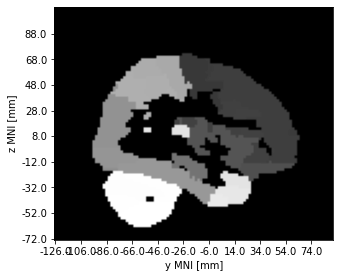

In [58]:
imshow_into_aal_space(data_aal[26, :, :])

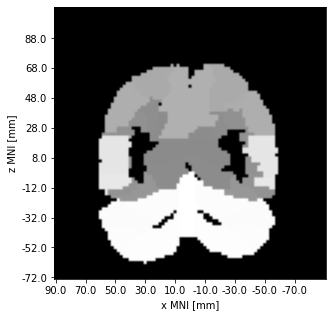

In [59]:
imshow_into_aal_space(data_aal[:, 30, :], view="xz")

In [18]:
fsavg_img = nib.load("../../neurolib/data/datasets/eeg_fsaverage/fsaverage/mri/T1.mgz")

In [19]:
fsavg_img.affine

array([[  -1.,    0.,    0.,  128.],
       [   0.,    0.,    1., -128.],
       [   0.,   -1.,    0.,  128.],
       [   0.,    0.,    0.,    1.]])

In [23]:
print(fsavg_img.header)

<class 'nibabel.freesurfer.mghformat.MGHHeader'> object, endian='>'
version      : 1
dims         : [256 256 256   1]
type         : 0
dof          : 0
goodRASFlag  : 1
delta        : [1. 1. 1.]
Mdc          : [[-1.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]
Pxyz_c       : [0. 0. 0.]
tr           : 0.0
flip_angle   : 0.0
te           : 0.0
ti           : 0.0
fov          : 256.0


In [24]:
fsavg_data = fsavg_img.get_fdata()

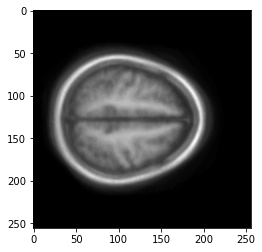

In [31]:
plt.imshow(fsavg_data[:,80,:].T, cmap="gray") # horizontal

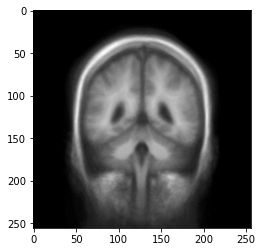

In [32]:
plt.imshow(fsavg_data[:,:,80].T, cmap="gray") # coronar

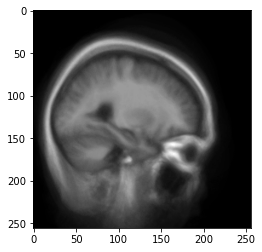

In [35]:
plt.imshow(fsavg_data[100,:,:], cmap="gray") # saggital

In [40]:
fsavg_img.affine @ fsavg_img.header["dims"]

array([-128.,  128., -128.,    1.])

In [41]:
fsavg_img.affine @ np.array([0,0,0,1])

array([ 128., -128.,  128.,    1.])